<a href="https://colab.research.google.com/github/Kashika18/Breast_Cancer_Prediction/blob/main/ddsm_trained_resnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.metrics import categorical_crossentropy

In [ ]:
from keras.models import Sequential, Model
from keras.layers import Conv2D,MaxPooling2D,GlobalAveragePooling2D
from keras.layers import Dense,Flatten,Dropout,Activation,BatchNormalization,AvgPool2D,MaxPool2D
from tensorflow.keras.optimizers import Adam
import cv2 

In [ ]:
from tensorflow.keras.applications.resnet50 import preprocess_input,decode_predictions,ResNet50
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
import os
imagelist=[]
filepath_images = "/content/drive/MyDrive/ddsm dataset split/train/Cancer" 
imagelist=os.listdir(filepath_images)
fileimgarr=[]

for i in imagelist:
        fileimgprint=os.path.join("/content/drive/MyDrive/ddsm dataset split/train/Cancer",str(i))
        fileimgarr.append(fileimgprint)
        
print ('filepaths: ', len(fileimgarr))

df = pd.DataFrame({"file_paths":fileimgarr})
df.head()

filepaths:  2157


,file_paths
0,/content/drive/MyDrive/ddsm dataset split/trai...
1,/content/drive/MyDrive/ddsm dataset split/trai...
2,/content/drive/MyDrive/ddsm dataset split/trai...
3,/content/drive/MyDrive/ddsm dataset split/trai...
4,/content/drive/MyDrive/ddsm dataset split/trai...


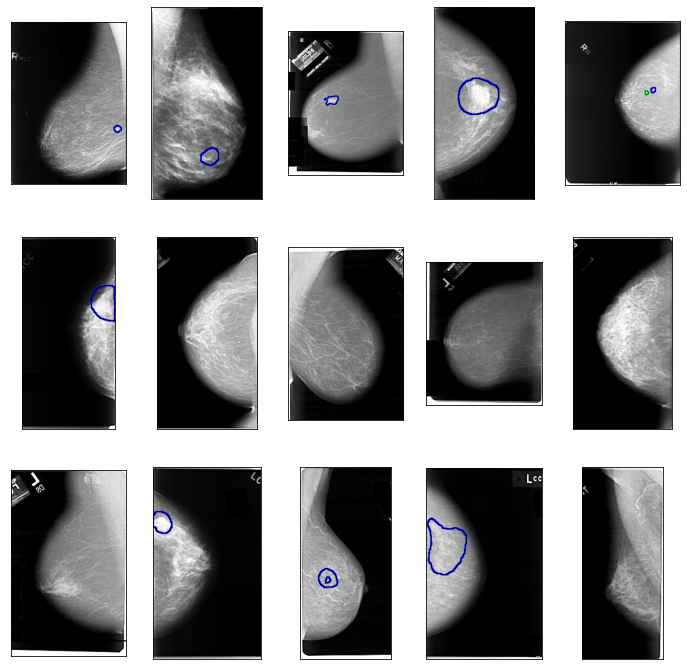

In [ ]:
plt.figure(figsize=(12,12))
for i in range(15):
    random = np.random.randint(1,len(fileimgarr))
    plt.subplot(3,5,i+1)
    plt.imshow(cv2.imread(df.loc[random,"file_paths"]))
    plt.xticks([])
    plt.yticks([])
    
plt.show()

In [ ]:
train_data='/content/drive/MyDrive/ddsm dataset split/train'
test_data='/content/drive/MyDrive/ddsm dataset split/test'
valid_data='/content/drive/MyDrive/ddsm dataset split/val'

In [ ]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   shear_range = 0.2, zoom_range = 0.2, 
                                   horizontal_flip = True,validation_split=0.4)

train_generator = train_datagen.flow_from_directory(train_data,
                                              target_size = (224,224), batch_size =512, 
                                              class_mode = 'categorical',subset='training')

val_generator = train_datagen.flow_from_directory(valid_data,
                                              target_size = (224,224), batch_size = 512, 
                                              class_mode = 'categorical',subset='validation')


Found 2277 images belonging to 2 classes.
Found 520 images belonging to 2 classes.


In [ ]:
test_generator = train_datagen.flow_from_directory(test_data,
                                              target_size = (224,224), batch_size = 1, 
                                              class_mode = 'categorical',subset='validation')


Found 506 images belonging to 2 classes.


In [ ]:
x,y=test_generator.next()
x.shape

(1, 224, 224, 3)

In [ ]:
base_model = ResNet50(include_top=False,weights='imagenet')
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x)
predictions=Dense(train_generator.num_classes,activation='softmax')(x)
model=Model(inputs=base_model.input,outputs=predictions)


94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 conv1_conv (Conv2D)            (None, None, None,   9472        ['conv1_pad[0][0]']              
                                64)                                                           

In [ ]:
for layer in base_model.layers:
  layer.trainable=False

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
hist = model.fit(train_generator,epochs=55)

Epoch 1/55
5/5 [==============================] - 439s 73s/step - loss: 4.0359 - accuracy: 0.5354
Epoch 2/55
5/5 [==============================] - 378s 71s/step - loss: 0.9297 - accuracy: 0.6227
Epoch 3/55
5/5 [==============================] - 387s 73s/step - loss: 0.6272 - accuracy: 0.7132
Epoch 4/55
5/5 [==============================] - 374s 70s/step - loss: 0.4990 - accuracy: 0.7295
Epoch 5/55
5/5 [==============================] - 376s 70s/step - loss: 0.4577 - accuracy: 0.7448
Epoch 6/55
5/5 [==============================] - 382s 73s/step - loss: 0.4416 - accuracy: 0.7624
Epoch 7/55
5/5 [==============================] - 374s 70s/step - loss: 0.4123 - accuracy: 0.7914
Epoch 8/55
5/5 [==============================] - 380s 70s/step - loss: 0.4061 - accuracy: 0.7918
Epoch 9/55
5/5 [==============================] - 381s 73s/step - loss: 0.3901 - accuracy: 0.8063
Epoch 10/55
5/5 [==============================] - 373s 82s/step - loss: 0.3845 - accuracy: 0.8094
Epoch 11/55
5/5 [==

In [ ]:
 model.save('/content/drive/MyDrive/projet dataset split/Resnet50 trained 55.h5')

In [ ]:
test_loss,test_acc = model.evaluate(test_generator,verbose=2)
print('test accuracy : ',test_acc)

506/506 - 252s - loss: 0.4076 - accuracy: 0.7846 - 252s/epoch - 498ms/step
test accuracy :  0.7845849990844727


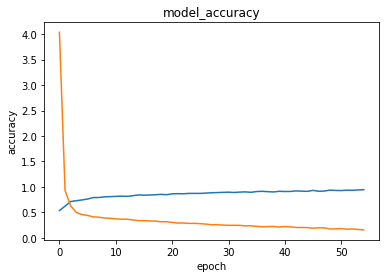

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['loss'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.show()

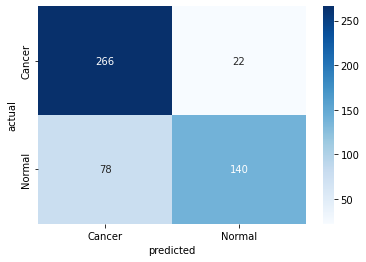

test_accuracy : 80.23715415019763 


In [ ]:
import seaborn as sns

model= tf.keras.models.load_model('/content/drive/MyDrive/projet dataset split/Resnet50 trained.h5')

filenames=test_generator.filenames
nb_samples=len(test_generator)
y_prob=[]
y_act=[]
test_generator.reset()
for i in range(nb_samples):
  X_test,Y_test=test_generator.next()
  y_prob.append(model.predict(X_test))
  y_act.append(Y_test)

predicted_class=[list(train_generator.class_indices.keys())[i.argmax()] for i in y_prob]
actual_class = [list(train_generator.class_indices.keys())[i.argmax()] for i in y_act]

out_df = pd.DataFrame(np.vstack([predicted_class,actual_class]).T,columns=['predicted_class','actual_class'])
confusion_matrix=pd.crosstab(out_df['actual_class'],out_df['predicted_class'],rownames=['actual'],colnames=['predicted'])

sns.heatmap(confusion_matrix,cmap='Blues',annot=True,fmt='d')
plt.show()
print('test_accuracy : {} '.format((np.diagonal(confusion_matrix).sum()/confusion_matrix.sum().sum()*100)))


1. model -> 
            resnet 50 (cnn)
            sequential model

2. dataset -> 
            ddsm dataset
            kaggle
            ddsm

            samples 
            total - 3500
            training me 2300
            test /validation - 500 500
            ratio - 6:2:2

3. model output ->
            test accuracy - 80
            train accuracy - 94

4. drawbacks -> 
           resnet 50 very heavy model since intensely packed with 50 layers
           we could not proceed more than 60 epochs

           data samples very less , used image data generator

           data very complex to understand

           labelled data was very hard to find

5. work division -> 
            data availability ( finding data , data pre processing , cleaning data , data visualisation)

            model selection and implementation (coding)

            results and output (metrics , results visualisation)
            
6. future work -> 
            improve vulnerabilities

            1. training in gpu runtime
            2. better dataset availability
            3. try with different image models(vgg 16 , resnext , inception v3)
            4. improve accuracy 

7. sequence of implementation -> 
            1. dataset collection from valid source
            2. help of research papers
            3. resnet 50 select
            4. divided dataset into test/train/valid (6:2:2)
            5. import dataset from google drive into a dataframe
            6. used image data generator to create a supply of images to the model
            7. imported resnet50 model from tenserflow library
            8.  added globavgpool , debse layer to final model
            9. trained resnet 50 model on our dataset samples upto 55 epochs , using imagenet weights
            10. used test accuracy , confusion matrix for results visualisation 
            11. graph btw loss and accuracy
            








